# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
import plotly.figure_factory as ff
import ast

np.set_printoptions(suppress=True,precision=6)

# Fixed 1-point correlation

In [39]:
results = pd.read_pickle('results/uni_0.01_500x=0only.pickle')
results_name = '0.01,0.00'
results_comp = pd.read_pickle('results/uni_0.01,0.005_500.pickle')
results_comp_name = '0.01,0.005'
results_comp2 = pd.read_pickle('results/uni_0.01,-0.01_500.pickle')
results_comp2_name = '0.01,-0.01'

cmp_mode = True

In [9]:
fig = go.Figure()

for T in results['T'].unique():
    fig.add_trace(go.Scatter(x = results[results['T'] == T]['1-point_corr'],
                             y = results[results['T'] == T]['F'],
                             mode='markers+lines',
                             name=f"T = {T}: ECI = {results.iloc[0]['F']/4:.2f}",
                            )
                 )
if cmp_mode:
    for T in results_comp['T'].unique():
        fig.add_trace(go.Scatter(x = results_comp[results_comp['T'] == T]['1-point_corr'],
                                 y = results_comp[results_comp['T'] == T]['F'],
                                 mode='markers+lines',
                                 name=f"T = {T}: ECI = {results_comp.iloc[0]['F']/4:.2f}",
                                )
                     )
#     for T in results_comp['T'].unique():
#         fig.add_trace(go.Scatter(x = results_comp2[results_comp2['T'] == T]['1-point_corr'],
#                                  y = results_comp2[results_comp2['T'] == T]['F'],
#                                  mode='markers+lines',
#                                  name=f"T = {T}: ECI = {results_comp.iloc[0]['F']/4:.2f}",
#                                 )
#                      )
fig.update_layout(
    title=f"F vs 1-point Corr",
    xaxis_title="1-point Corr",
    yaxis_title="F",
    legend_title="Temperature",
    template='seaborn'
)
#fig.update_traces(texttemplate='%{text:.2s}', textposition='top center')
fig.show()

In [40]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = results[results['1-point_corr'] == 0.0]['T'],
                         y = results[results['1-point_corr'] == 0.0]['corrs'].str[2],
                         mode='markers+lines',
                         name=results_name
                        )
             )

if cmp_mode:
    fig.add_trace(go.Scatter(x = results_comp[results_comp['1-point_corr'] == 0.0]['T'],
                             y = results_comp[results_comp['1-point_corr'] == 0.0]['corrs'].str[2],
                             mode='markers+lines',
                             name=results_comp_name
                            )
                 )
    fig.add_trace(go.Scatter(x = results_comp2[results_comp2['1-point_corr'] == 0.0]['T'],
                             y = results_comp2[results_comp2['1-point_corr'] == 0.0]['corrs'].str[2],
                             mode='markers+lines',
                             name=results_comp2_name
                            )
                 )
    
fig.update_layout(
    title="T vs 2-point Corr",
    xaxis_title="T",
    yaxis_title="2-point Corr",
    template='seaborn'
)
#fig.update_traces(texttemplate='%{text:.2s}', textposition='top center')
fig.show()

In [ ]:
results[(results['1-point_corr'] == 0.0) & (results['T'] == 1000.0)]['corrs'].str[2]

In [23]:
a = [1,2,3,4]
b = [5,6,7,8]
[1,2,*b]
corr0 = [1,2,3,4,5,6]

In [33]:
np.linspace(1,1,1)

array([1.])

In [71]:
results_blanket['T'].unique()

array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.])

In [96]:
results_blanket = pd.read_pickle('results/blanket_0.01_500_08.pickle')

fig = go.Figure()
for temp in results_blanket['T'].unique():
    fig.add_trace(go.Scatter(x = results_blanket[results_blanket['T'] == temp]['2-point_corr'],
                             y = results_blanket[results_blanket['T'] == temp]['F'],
                             mode='markers+lines',
                             name=f"T = {T}: ECI = {results_blanket.iloc[0]['F']/4:.2f}",
                            )
                 )
    
fig.update_layout(
    title="T vs 2-point Corr",
    xaxis_title="2-point Corr",
    yaxis_title="Energy",
    template='seaborn'
)
fig.show()

# Fixed 1-pt and 2-pt NN correlation

In [15]:
from scipy.spatial import Delaunay
fig = go.Figure()
results_blanket = pd.read_pickle('results/blanket_0.01_500_08.pickle')

Xs = results_blanket['1-point_corr'].values
Ys = results_blanket['2-point_corr'].values
Zs = results_blanket['F'].values

points2D = np.vstack([Xs,Ys]).T
tri = Delaunay(points2D)

simplices = tri.simplices

In [ ]:
# fig = go.Figure()
# #fig.add_trace(traces)
# fig.update_layout(
#     xaxis_title="1-point Corr",
#     yaxis_title="2-point Corr",
#     template='ggplot2',
#     legend_title="Legend Title",
# )
# for temp in [0,50]:#[0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.]:
#     Xs = results_blanket[results_blanket['T'] == temp]['1-point_corr'].values
#     Ys = results_blanket[results_blanket['T'] == temp]['2-point_corr'].values
#     Zs = results_blanket[results_blanket['T'] == temp]['F'].values
#     points2D = np.vstack([Xs,Ys]).T
#     tri = Delaunay(points2D)

#     simplices = tri.simplices
#     temp_trace = ff.create_trisurf(x=Xs, y=Ys, z=Zs,
#                                    simplices=simplices,
#                                    title="F vs singlet-NN-corrlations",
#                                    width=1000,
#                                    height=1000,
#                                    #aspectratio=dict(x=1, y=1, z=10)
#                                   )
#     fig.add_traces([temp_trace.data[0]])

# fig.layout.scene.xaxis.title='1-point Correlation'
# fig.layout.scene.yaxis.title='2-point Correlation'
# fig.layout.scene.zaxis.title='F'

# fig.update_layout(
#     autosize=False,
#     width=750,
#     height=750,
# )


# fig.show()

In [ ]:
# fig = go.Figure()


# results = results_blanket#[(results_blanket['T'] == 250) | (results_blanket['T'] == 125)]

# for T in [500]:
#     results = results_blanket[results_blanket['T'] == T]
#     fig.add_trace(go.Scatter3d(x = results['1-point_corr'],
#                                y = results['2-point_corr'],
#                                z = results['F'],
#                                mode='markers',
#                                #name=f"T = {T}: ECI = {results_blanket.iloc[0]['F']/4:.2f}",
#                               )
#                  )

#     fig.update_traces(marker=dict(size=3,
#                                   line=dict(width=2,
#                                            ),
#                                   color=list(results['T'].values),
#                                   colorscale='Viridis',
#                                   colorbar=dict(thickness=20)
#                                  ),#'DarkSlateGrey')),

#                       selector=dict(mode='markers'))

#     fig.update_layout(
#         title="F vs sinle and pair Correlation",
#         template='seaborn',
#         scene = dict(
#             xaxis = dict(title='1-pt Correlation'),
#             yaxis = dict(title='2-pt Correlation'),
#             zaxis = dict(title='F')),
#     ),


#     fig.show()

In [77]:
results_blanket['T'].unique()

array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.])

In [78]:
temperatures

array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.])

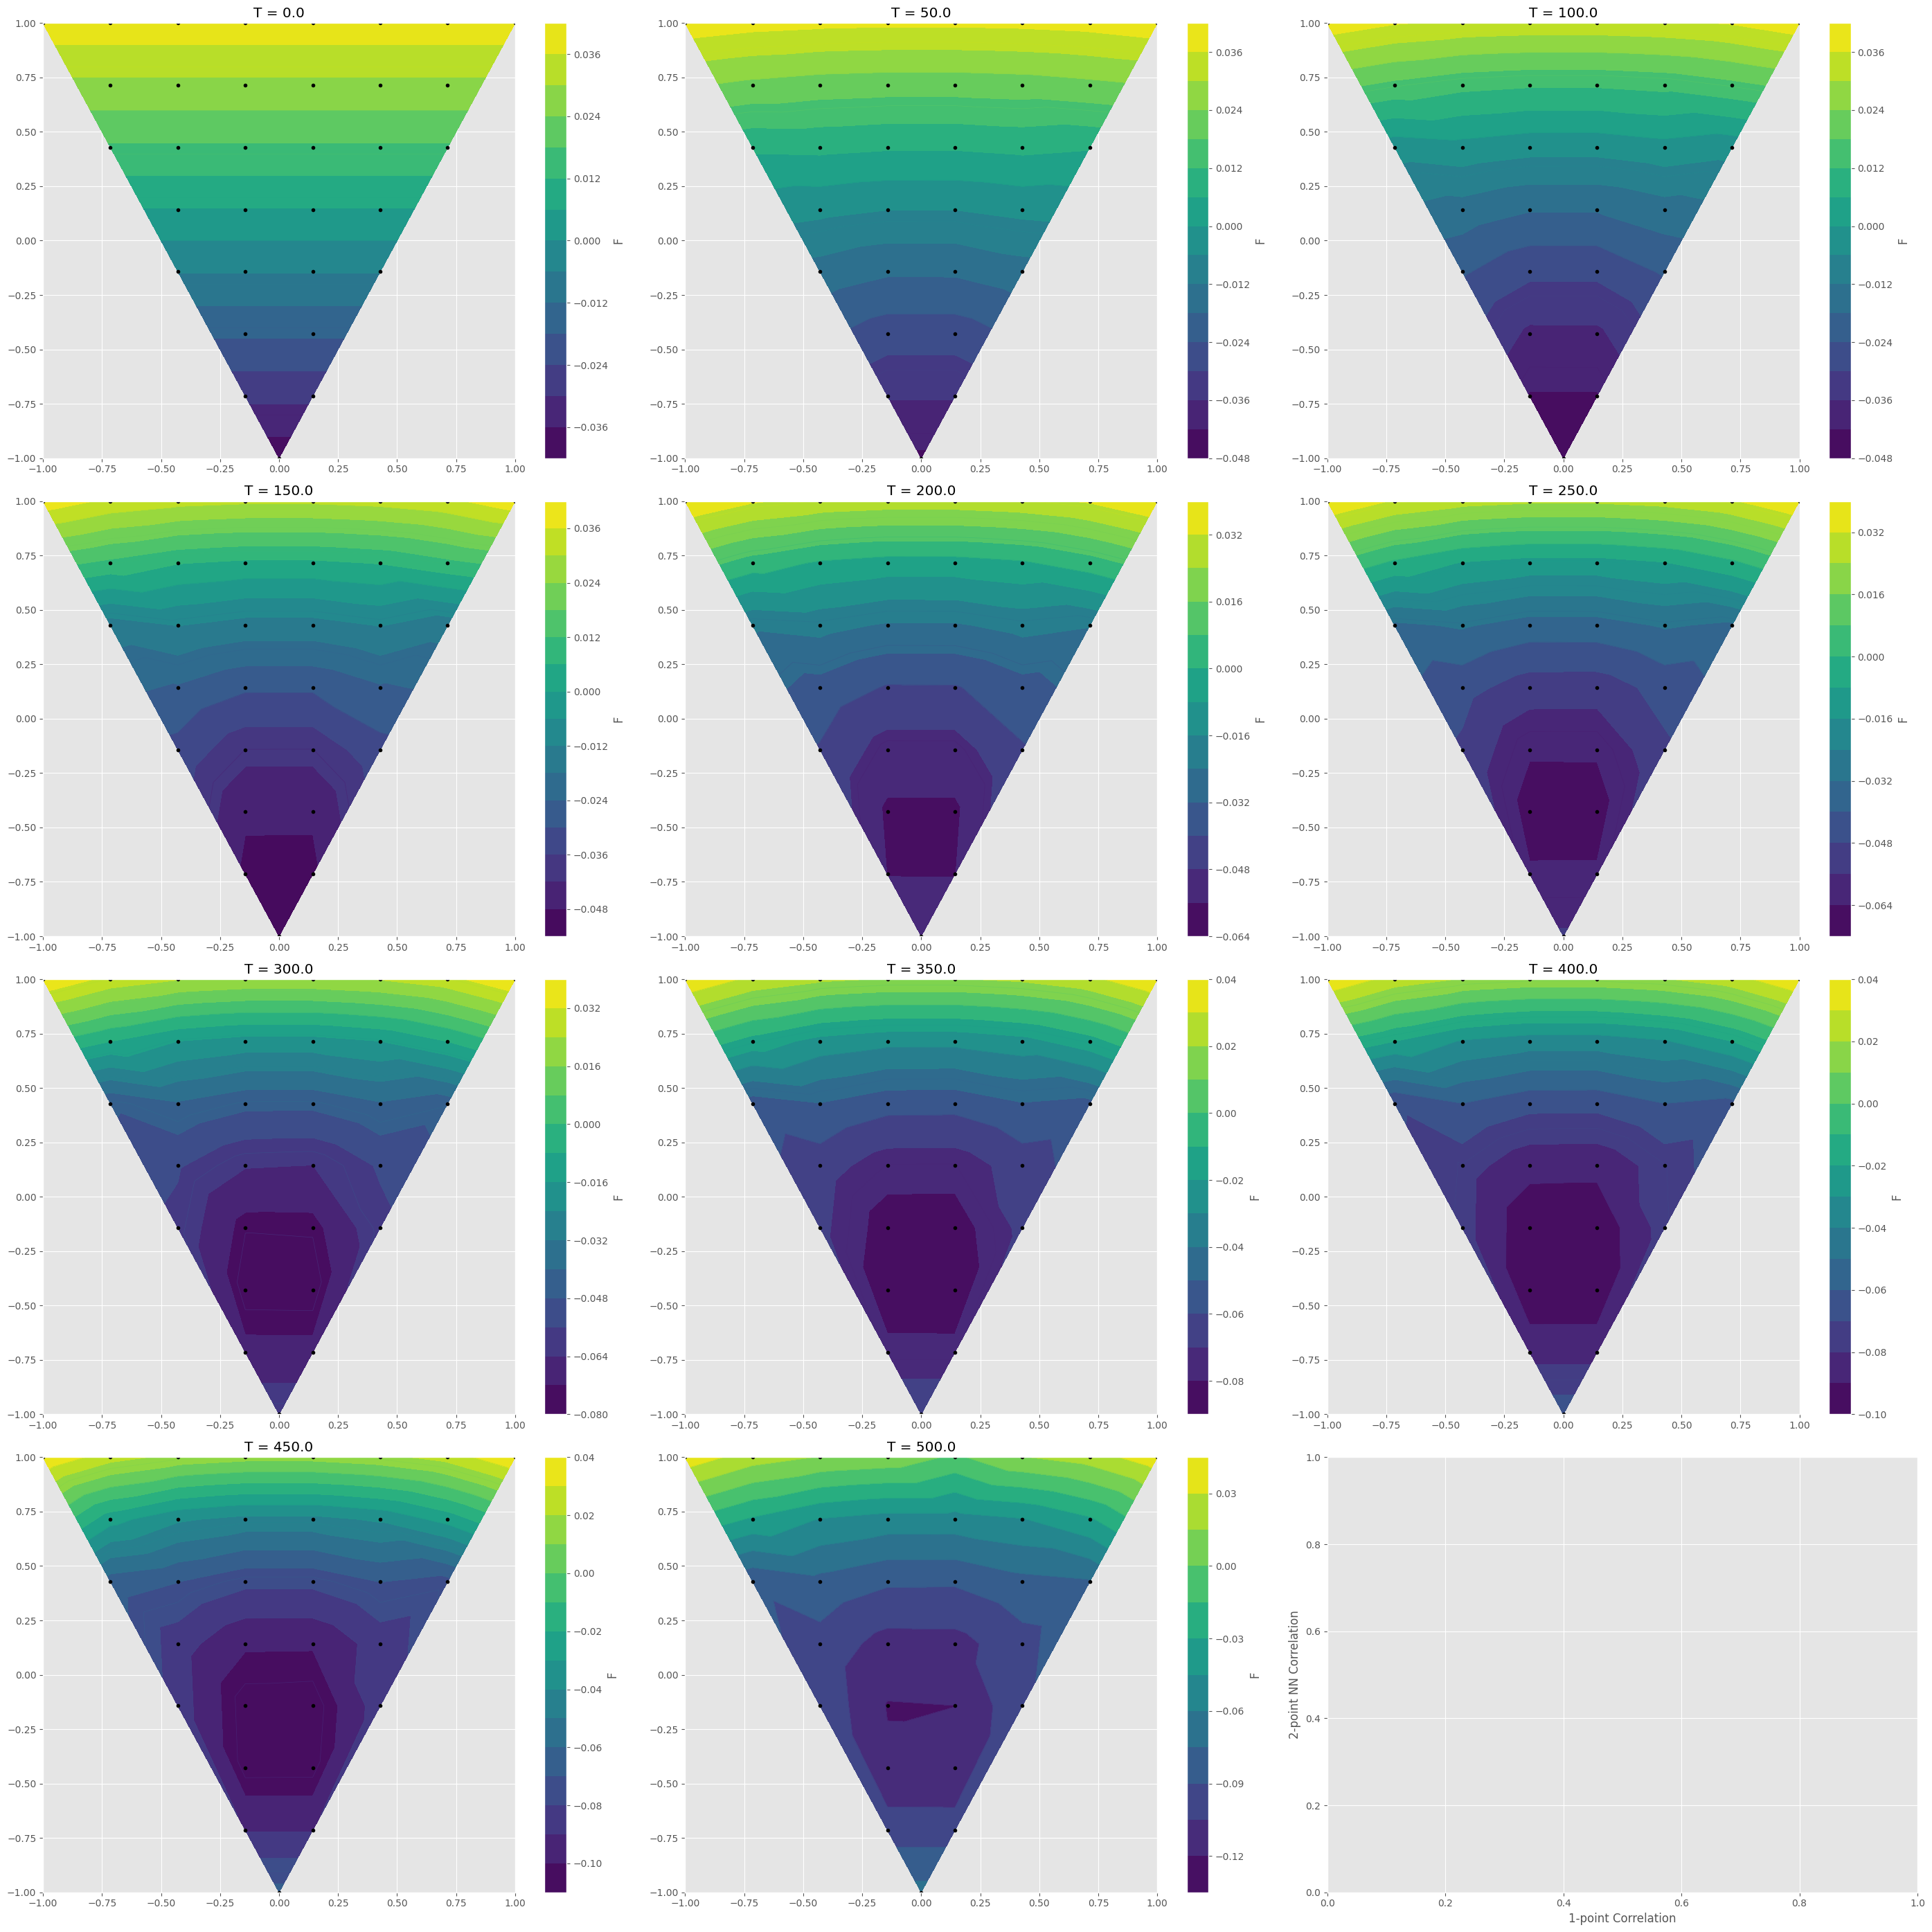

In [19]:
import matplotlib.tri as tri

single_temp = 300
single = False
temperatures = results_blanket['T'].unique()

plt.style.use('ggplot')
if not single:
    fig, axs = plt.subplots(nrows=4,
                            ncols=3,
                            figsize=(28, 28), 
                            dpi=100)
else:
    fig, axs = plt.subplots(nrows=1,figsize=(8, 6),dpi=100)
    temp = single_temp 

for i, ax2 in enumerate(fig.axes):

    if not single:
        try:
            temp = temperatures[i]
        except IndexError:
            continue
    else:
        temp = single_temp
    
    Xs = results_blanket[results_blanket['T'] == temp]['1-point_corr'].values
    Ys = results_blanket[results_blanket['T'] == temp]['2-point_corr'].values
    Zs = results_blanket[results_blanket['T'] == temp]['F'].values
    
    ax2.set_title(f'T = {temp}')
    
    ax2.tricontour(Xs, Ys, Zs, levels=10, linewidths=0.5,)
    cntr2 = ax2.tricontourf(Xs, Ys, Zs, levels=14,)
    
    fig.colorbar(cntr2, ax=ax2,label='F',)
    ax2.plot(Xs, Ys, 'ko', ms=3)
    ax2.set(xlim=(-1, 1), ylim=(-1, 1))

    plt.xlabel("1-point Correlation")
    plt.ylabel("2-point NN Correlation")
    plt.subplots_adjust(hspace=0.5)

plt.tight_layout()
plt.show()

In [85]:
results_blanket

,T,1-point_corr,2-point_corr,F,corrs
0,0.0,-0.052632,-0.894737,-0.035789,"[1.0000000034868197, -0.05263157853401845, -0...."
1,0.0,0.052632,-0.894737,-0.035789,"[1.0000000037013677, 0.05263157874838542, -0.8..."
2,0.0,-0.052632,-0.789474,-0.031579,"[1.0, -0.05263157894736836, -0.789473684210526..."
3,0.0,0.052632,-0.789474,-0.031579,"[1.0, 0.05263157894736837, -0.7894736842105261..."
4,0.0,-0.157895,-0.684211,-0.027368,"[1.0000000045365027, -0.1578947352810913, -0.6..."
...,...,...,...,...,...
2195,500.0,0.684211,1.000000,0.021207,"[1.0000000045119195, 0.6842105167403212, 0.999..."
2196,500.0,0.789474,1.000000,0.025501,"[1.0000000038536705, 0.7894736746463109, 0.999..."
2197,500.0,0.894737,1.000000,0.031116,"[1.0000000034895447, 0.8947368324710926, 0.999..."
2198,500.0,1.000000,1.000000,0.040000,"[1.0000000024171083, 0.9999999925344217, 0.999..."
